In [1]:
!pip install ultralytics
!pip install roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 40.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
#importing the yolo libraries
from ultralytics import YOLO
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# uploading the dataset zip file
#generated by generative AI
from google.colab import files
uploaded = files.upload()


Saving football-players-detection.v2i.yolov8.zip to football-players-detection.v2i.yolov8.zip


In [4]:
# extract the zip file
# generated by generative AI
import zipfile

zip_path = "/content/football-players-detection.v2i.yolov8.zip"
extract_path = "/content/football-players-data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [5]:
# Train Yolov8 on my dataset
# Train model
model = YOLO('yolov8n.pt')

results = model.train(
    data=f"{extract_path}/data.yaml",
    epochs=20,
    imgsz=640,
    batch=16
)


Ultralytics 8.3.186 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/football-players-data/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pr

In [6]:
# Load trained model
trained_model = YOLO('runs/detect/train/weights/best.pt')

# Test on an image
result = trained_model.predict(source='https://ultralytics.com/images/bus.jpg', save=True)



image 1/1 /content/bus.jpg: 640x480 (no detections), 335.2ms
Speed: 12.5ms preprocess, 335.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


In [11]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [12]:
import os

path = "/content/drive/MyDrive/colab"
print("Files in colab folder:", os.listdir(path))



Files in colab folder: [' FRIENDLY.mp4', 'best_backup.pt']


In [12]:
video_path = '/content/drive/MyDrive/colab/ FRIENDLY.mp4'
print("File found:", os.path.exists(video_path))



File found: True


In [7]:
!pip install ultralytics opencv-python-headless


In [8]:
from ultralytics import YOLO

model = YOLO('runs/detect/train/weights/best.pt')


In [13]:
import cv2
import os

video_path = '/content/drive/MyDrive/colab/ FRIENDLY.mp4'  # your 2hr video
output_dir = '/content/processed_frames'
os.makedirs(output_dir, exist_ok=True)

# Open the video
cap = cv2.VideoCapture(video_path)
frame_rate = cap.get(cv2.CAP_PROP_FPS)
frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Process every Nth frame (e.g., 1 every 5 seconds)
    if frame_count % int(frame_rate * 5) == 0:
        frame_path = f"{output_dir}/frame_{frame_count}.jpg"
        cv2.imwrite(frame_path, frame)

        results = model.predict(source=frame_path, save=True, save_txt=True,
                                conf=0.3, project='runs', name='video_preds', exist_ok=True)

        print(f"Processed frame {frame_count}")

    frame_count += 1

cap.release()
print("✅ Done processing selected frames.")


Streaming output truncated to the last 5000 lines.
Processed frame 190200

image 1/1 /content/processed_frames/frame_190500.jpg: 384x640 14 players, 221.8ms
Speed: 4.4ms preprocess, 221.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/video_preds
516 labels saved to runs/video_preds/labels
Processed frame 190500

image 1/1 /content/processed_frames/frame_190800.jpg: 384x640 15 players, 152.7ms
Speed: 3.2ms preprocess, 152.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/video_preds
517 labels saved to runs/video_preds/labels
Processed frame 190800

image 1/1 /content/processed_frames/frame_191100.jpg: 384x640 12 players, 147.2ms
Speed: 3.1ms preprocess, 147.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/video_preds
518 labels saved to runs/video_preds/labels
Processed frame 191100

image 1/1 /content/processed_frames/frame_191400.jpg: 384x640 (no detections), 

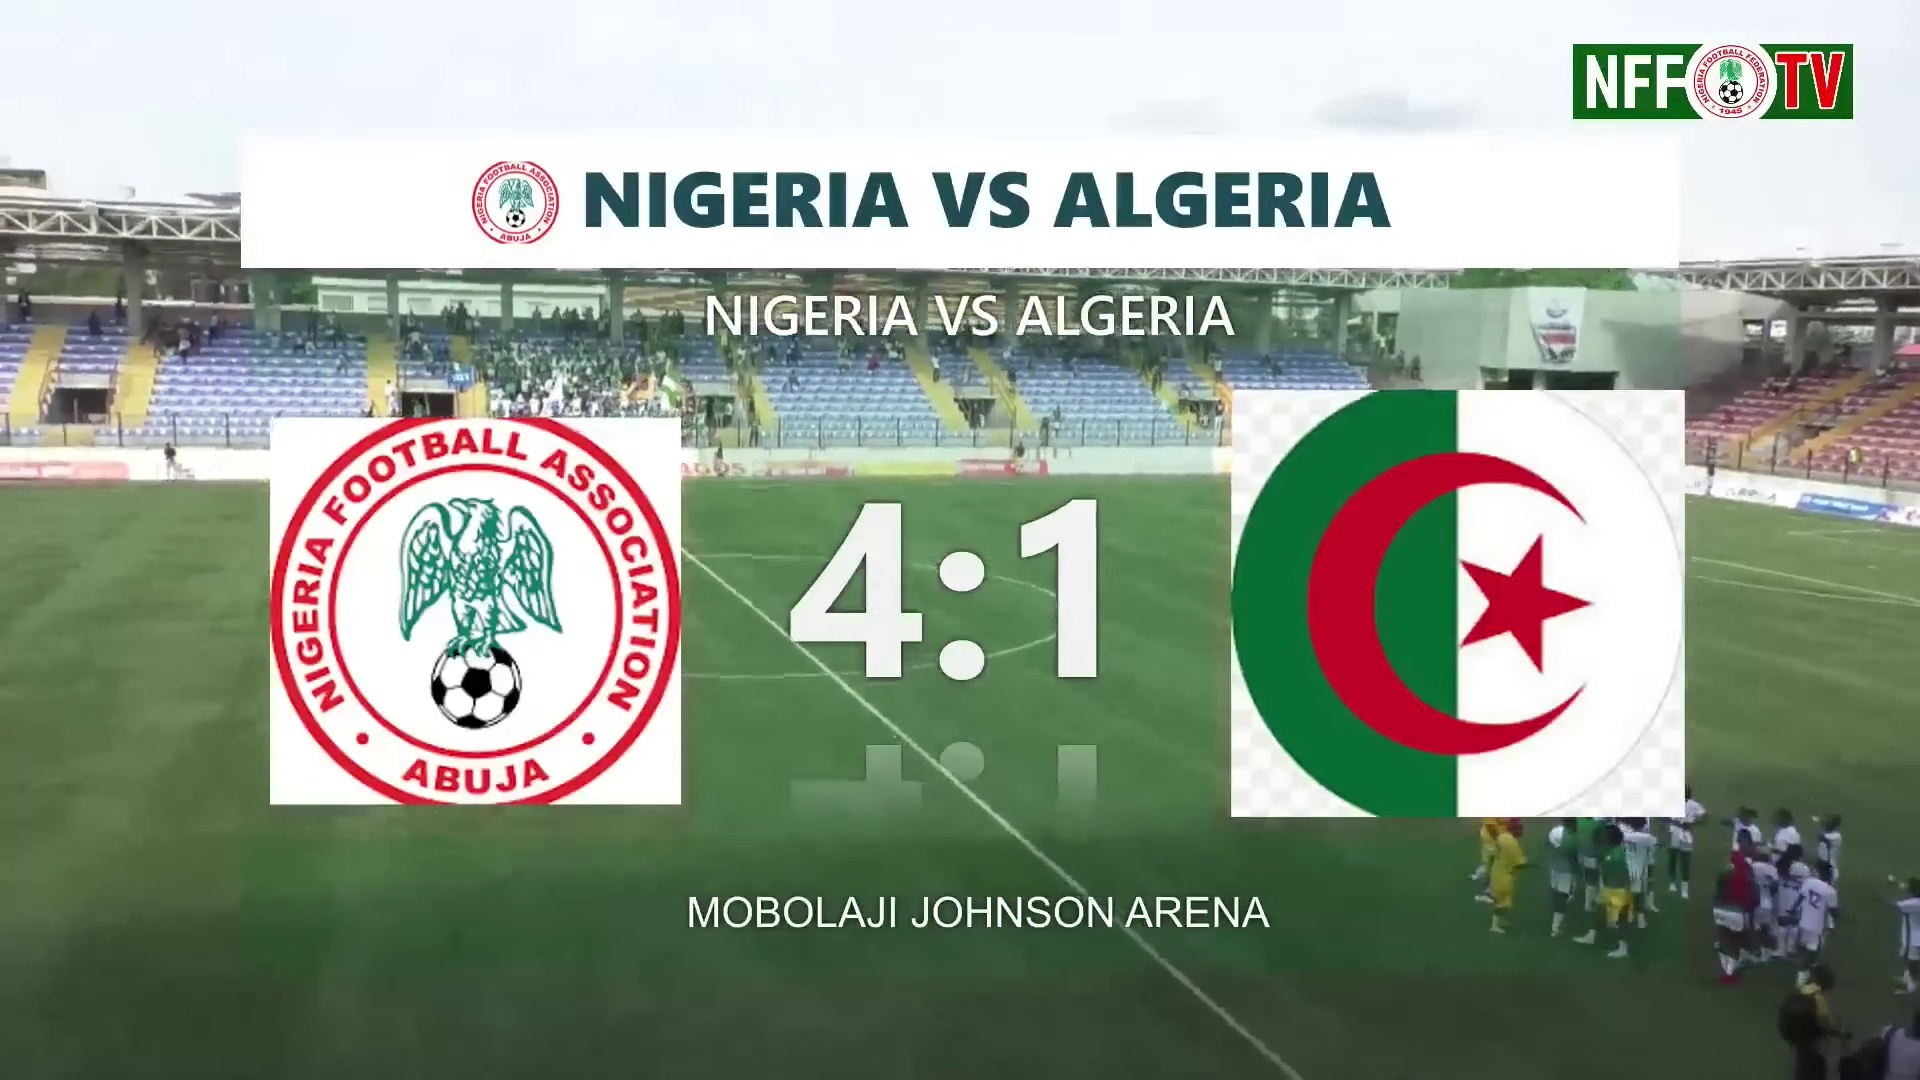

In [14]:
import IPython.display as display
from PIL import Image

# Pick a frame (e.g., 410100)
frame_path = 'runs/video_preds/frame_440100.jpg'
display.display(Image.open(frame_path))


In [15]:
import os

label_dir = 'runs/video_preds/labels'
frames_with_labels = os.listdir(label_dir)
print("Detected frames:", frames_with_labels[:5])  # Show first 5


Detected frames: ['frame_68100.txt', 'frame_378000.txt', 'frame_258300.txt', 'frame_266100.txt', 'frame_60000.txt']


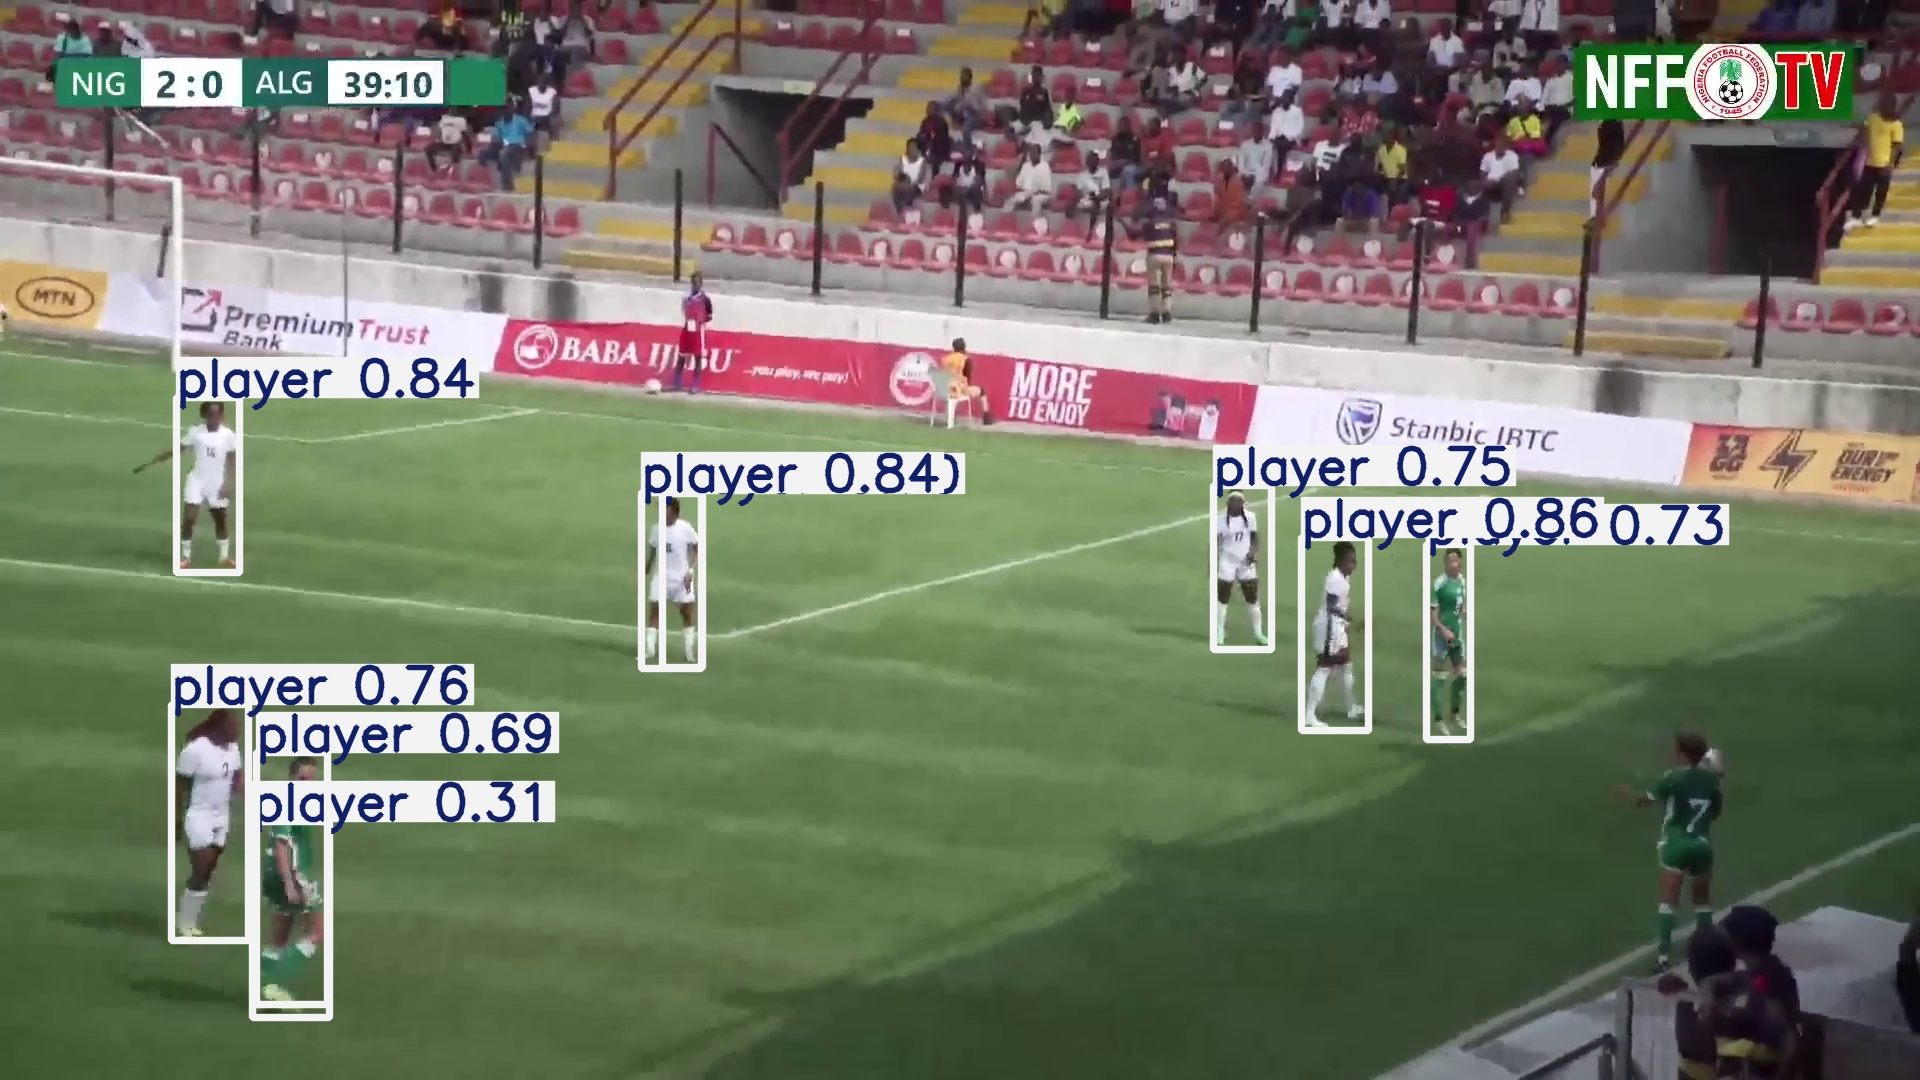

In [16]:
from PIL import Image
import IPython.display as display

# display one of the frames for the video
frame_id = 'frame_166200'
img_path = f'runs/video_preds/{frame_id}.jpg'

display.display(Image.open(img_path))


In [17]:
import json

# Set the path to the labelled files
label_folder = "runs/video_preds/labels"
output_json = "video_predictions.json"


class_names = ["player"]

data = {}

# Loop through all label files
for file_name in os.listdir(label_folder):
    if file_name.endswith(".txt"):
        frame_id = file_name.replace(".txt", "")
        frame_path = f"processed_frames/{frame_id}.jpg"

        with open(os.path.join(label_folder, file_name), "r") as file:
            annotations = file.readlines()

        objects = []
        for line in annotations:
            parts = line.strip().split()
            if len(parts) >= 5:
                class_id = int(parts[0])
                x_center, y_center, width, height = map(float, parts[1:5])
                conf = float(parts[5]) if len(parts) == 6 else None

                obj = {
                    "class_id": class_id,
                    "class_name": class_names[class_id] if class_id < len(class_names) else f"class_{class_id}",
                    "bbox": {
                        "x_center": x_center,
                        "y_center": y_center,
                        "width": width,
                        "height": height
                    }
                }

                if conf is not None:
                    obj["confidence"] = conf

                objects.append(obj)

        data[frame_id] = {
            "frame_path": frame_path,
            "objects": objects
        }

# Save as JSON
with open(output_json, "w") as json_file:
    json.dump(data, json_file, indent=4)

print(f"Saved predictions to {output_json}")


Saved predictions to video_predictions.json


In [18]:


# Load predictions
with open("video_predictions.json", "r") as f:
    predictions = json.load(f)

# Preview the structure (first 2 frames)
for i, (frame_id, frame_data) in enumerate(predictions.items()):
    print(f"{frame_id}: {frame_data}")
    if i == 1:
        break


frame_68100: {'frame_path': 'processed_frames/frame_68100.jpg', 'objects': [{'class_id': 2, 'class_name': 'class_2', 'bbox': {'x_center': 0.526616, 'y_center': 0.247401, 'width': 0.0329784, 'height': 0.108356}}, {'class_id': 2, 'class_name': 'class_2', 'bbox': {'x_center': 0.422874, 'y_center': 0.315665, 'width': 0.0313663, 'height': 0.12343}}, {'class_id': 2, 'class_name': 'class_2', 'bbox': {'x_center': 0.577513, 'y_center': 0.164128, 'width': 0.018528, 'height': 0.120041}}, {'class_id': 2, 'class_name': 'class_2', 'bbox': {'x_center': 0.0700564, 'y_center': 0.57295, 'width': 0.039601, 'height': 0.187327}}, {'class_id': 2, 'class_name': 'class_2', 'bbox': {'x_center': 0.214084, 'y_center': 0.483722, 'width': 0.0321691, 'height': 0.165142}}, {'class_id': 2, 'class_name': 'class_2', 'bbox': {'x_center': 0.720681, 'y_center': 0.475719, 'width': 0.0393587, 'height': 0.175248}}, {'class_id': 2, 'class_name': 'class_2', 'bbox': {'x_center': 0.709972, 'y_center': 0.606354, 'width': 0.044771

In [19]:
!git clone https://github.com/mikel-brostrom/Yolov5_DeepSort_PyTorch.git
%cd /content/Yolov5_DeepSort_PyTorch/Yolov5_DeepSort_PyTorch


Cloning into 'Yolov5_DeepSort_PyTorch'...
remote: Enumerating objects: 19231, done.
remote: Counting objects: 100% (627/627), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 19231 (delta 495), reused 505 (delta 477), pack-reused 18604 (from 5)
Receiving objects: 100% (19231/19231), 129.62 MiB | 27.62 MiB/s, done.
Resolving deltas: 100% (12233/12233), done.
[Errno 2] No such file or directory: '/content/Yolov5_DeepSort_PyTorch/Yolov5_DeepSort_PyTorch'
/content


In [23]:
%cd /content/Yolov5_DeepSort_Pytorch



[Errno 2] No such file or directory: '/content/Yolov5_DeepSort_Pytorch'
/content


In [20]:
!pip install -q torch torchvision torchaudio
!pip install -q filterpy scikit-learn lap cython matplotlib opencv-python-headless


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.5 MB/s eta 0:00:00


In [21]:
!pip install deep_sort_realtime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 49.9 MB/s eta 0:00:00


In [22]:
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort
import cv2

# Load the trained YOLOv8 model
model = YOLO('/content/drive/MyDrive/colab/best_backup.pt')

# Initialize DeepSORT
tracker = DeepSort(max_age=30)

In [24]:
#this section is generated by generative AI

#using deepsort to track the players and giving them unique id
tracked_results = []  # To store results for export

input_dir = '/content/processed_frames'  # the processed frames folder
frame_files = sorted(os.listdir(input_dir))

for frame_id, frame_name in enumerate(frame_files):
    frame_path = os.path.join(input_dir, frame_name)
    frame = cv2.imread(frame_path)

    results = model.predict(source=frame, conf=0.4, iou=0.5, verbose=False)[0]
    detections = []

    for box in results.boxes:
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
        conf = box.conf[0].item()
        cls_id = int(box.cls[0].item())
        detections.append(([x1, y1, x2 - x1, y2 - y1], conf, cls_id))

    tracks = tracker.update_tracks(detections, frame=frame)

    for track in tracks:
        if not track.is_confirmed():
            continue

        track_id = track.track_id
        ltrb = track.to_ltrb()
        tracked_results.append({
            'frame_id': frame_id,
            'track_id': track_id,
            'x1': int(ltrb[0]),
            'y1': int(ltrb[1]),
            'x2': int(ltrb[2]),
            'y2': int(ltrb[3])
        })


In [25]:
import pandas as pd

df = pd.DataFrame(tracked_results)
df.to_csv('tracked_players.csv', index=False)
print("Tracking complete. Saved to 'tracked_players.csv'")

Tracking complete. Saved to 'tracked_players.csv'


In [26]:
df = pd.read_csv('tracked_players.csv')
print(df.columns)
df.head()


Index(['frame_id', 'track_id', 'x1', 'y1', 'x2', 'y2'], dtype='object')


frame_id  track_id    x1   y1    x2    y2
0         0      7682  1404  191  1444   318
1         0      8383  1570  297  1657   481
2         0      8805  1115  799  1207  1052
3         1      7682  1409  194  1450   322
4         1      8383  1571  291  1659   477

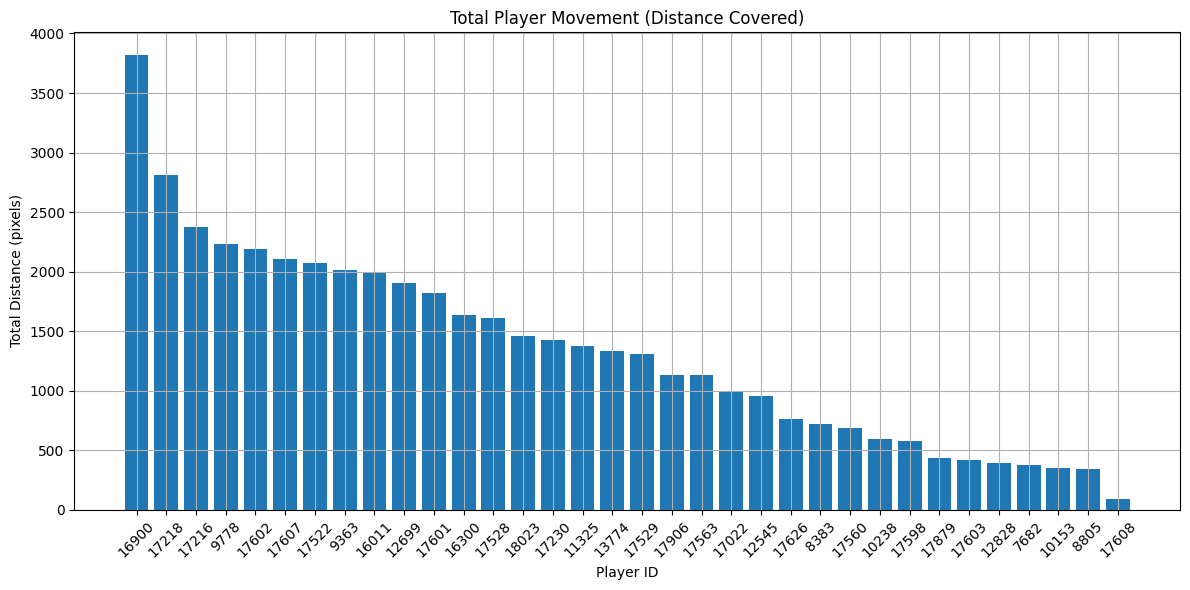

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Load tracked data
df = pd.read_csv('tracked_players.csv')

# Convert to numeric
cols = ['frame_id', 'track_id', 'x1', 'y1', 'x2', 'y2']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

# Compute center point of each bounding box
df['cx'] = (df['x1'] + df['x2']) / 2
df['cy'] = (df['y1'] + df['y2']) / 2

# Sort by track_id and frame
df = df.sort_values(by=['track_id', 'frame_id'])

# Compute movement distance per player
distances = []
for player_id, group in df.groupby('track_id'):
    group = group.sort_values('frame_id')
    dx = group['cx'].diff().fillna(0)
    dy = group['cy'].diff().fillna(0)
    dist = np.sqrt(dx**2 + dy**2)
    total_distance = dist.sum()
    distances.append((player_id, total_distance))

# Convert to DataFrame
distance_df = pd.DataFrame(distances, columns=['Player ID', 'Distance Covered'])

# Sort by distance covered
distance_df = distance_df.sort_values(by='Distance Covered', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(distance_df['Player ID'].astype(str), distance_df['Distance Covered'])
plt.xlabel('Player ID')
plt.ylabel('Total Distance (pixels)')
plt.title('Total Player Movement (Distance Covered)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
df['center_x'] = (df['x1'] + df['x2']) / 2
df['center_y'] = (df['y1'] + df['y2']) / 2

df['dx'] = df.groupby('track_id')['center_x'].diff()
df['dy'] = df.groupby('track_id')['center_y'].diff()

df['distance'] = np.sqrt(df['dx']**2 + df['dy']**2)


avg_speed_per_player = df.groupby('track_id')['distance'].mean().sort_values(ascending=False)
peak_speed_per_player = df.groupby('track_id')['distance'].max().sort_values(ascending=False)


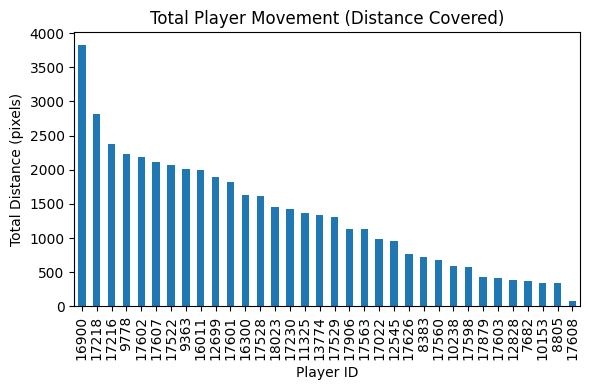

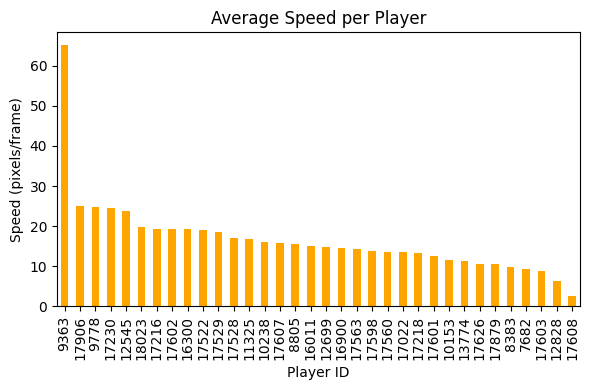

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the tracking data
df = pd.read_csv('tracked_players.csv')

# Convert columns to numeric (in case they aren't)
cols = ['frame_id', 'track_id', 'x1', 'y1', 'x2', 'y2']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

# Compute center point of each bounding box (player position)
df['cx'] = (df['x1'] + df['x2']) / 2
df['cy'] = (df['y1'] + df['y2']) / 2

# Sort by track_id and frame_id for correct frame-by-frame comparison
df = df.sort_values(by=['track_id', 'frame_id'])

# Compute distance and speed per frame
df['dx'] = df.groupby('track_id')['cx'].diff()
df['dy'] = df.groupby('track_id')['cy'].diff()
df['distance'] = np.sqrt(df['dx']**2 + df['dy']**2)
df['speed'] = df['distance']  # Assuming 1 frame = 1 time unit (e.g., 1/30 sec)

# Total Distance Covered (per player)
total_distance = df.groupby('track_id')['distance'].sum().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
total_distance.plot(kind='bar')
plt.title('Total Player Movement (Distance Covered)')
plt.xlabel('Player ID')
plt.ylabel('Total Distance (pixels)')
plt.tight_layout()
plt.show()

# Average Speed per Player (Workload Intensity)
avg_speed = df.groupby('track_id')['speed'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
avg_speed.plot(kind='bar', color='orange')
plt.title('Average Speed per Player')
plt.xlabel('Player ID')
plt.ylabel('Speed (pixels/frame)')
plt.tight_layout()
plt.show()

# Optional: Save final data
df.to_csv('player_physical_metrics.csv', index=False)


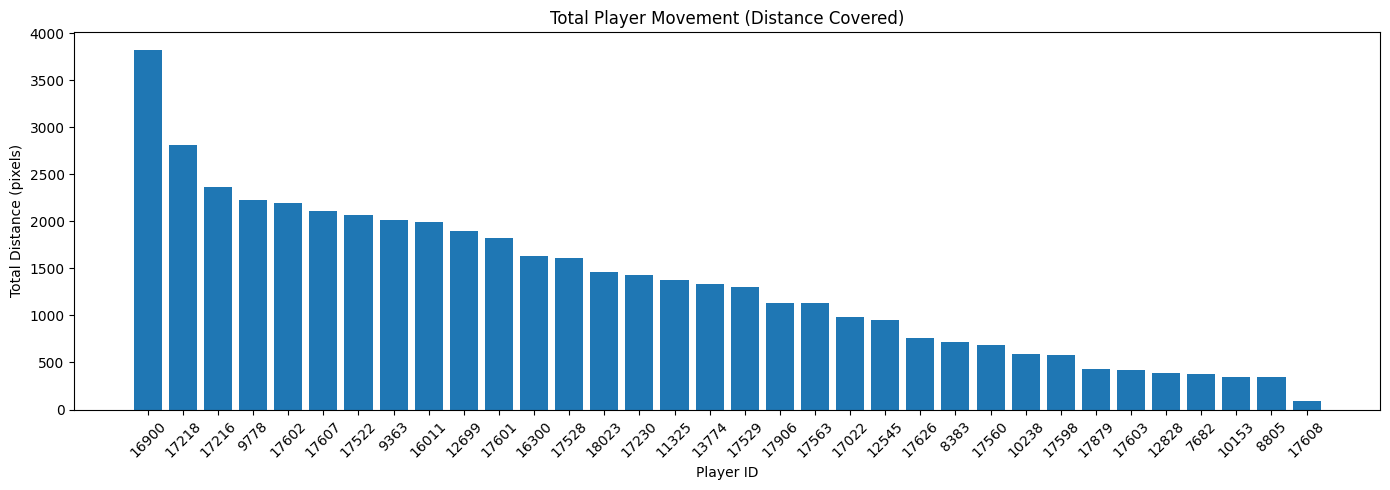

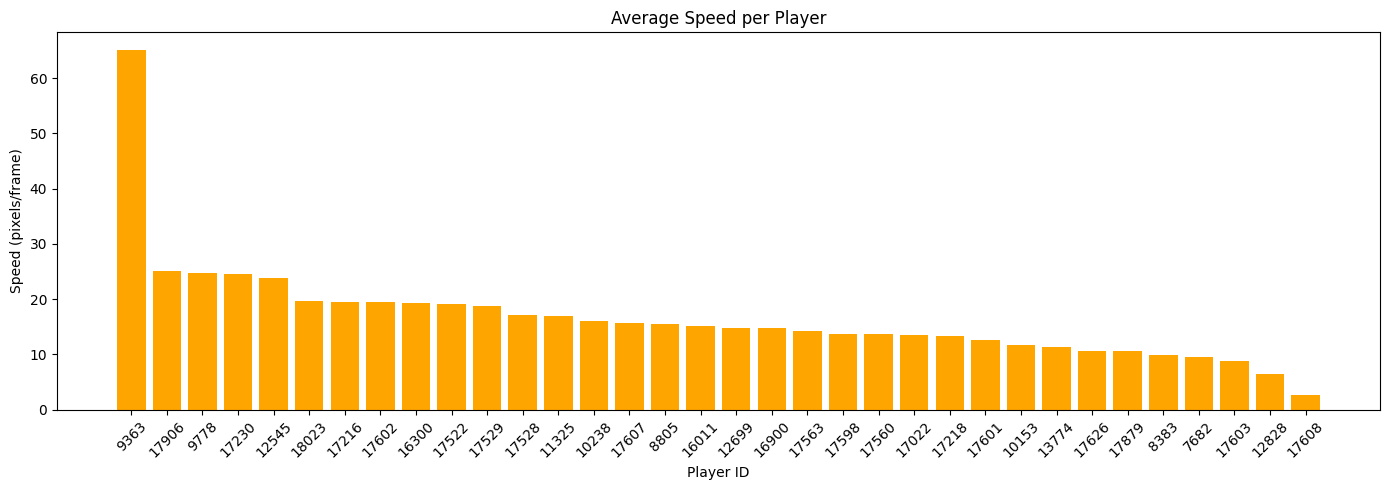

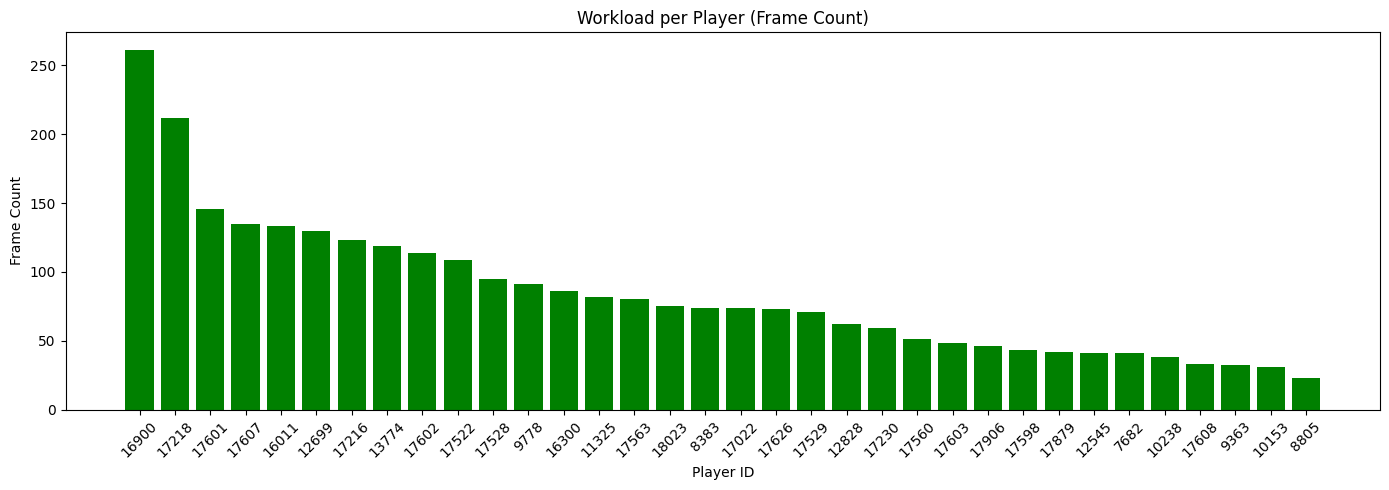

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load tracked data
df = pd.read_csv('tracked_players.csv')

# Convert to numeric in case any column is string type
cols = ['frame_id', 'track_id', 'x1', 'y1', 'x2', 'y2']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

# Compute center point of each bounding box
df['cx'] = (df['x1'] + df['x2']) / 2
df['cy'] = (df['y1'] + df['y2']) / 2

# Sort data by track and frame to keep motion order
df = df.sort_values(by=['track_id', 'frame_id'])

# Compute distance and speed per frame
df['dx'] = df.groupby('track_id')['cx'].diff()
df['dy'] = df.groupby('track_id')['cy'].diff()
df['distance'] = np.sqrt(df['dx']**2 + df['dy']**2)
df['speed'] = df['distance']  # assuming 1 frame = 1 time unit

# Group by player (track_id) to calculate total distance, avg speed, and workload
summary = df.groupby('track_id').agg(
    total_distance=('distance', 'sum'),
    average_speed=('speed', 'mean'),
    workload=('frame_id', 'count')
).reset_index()

# Save results
summary.to_csv('player_physical_metrics.csv', index=False)

# Plot total distance
plt.figure(figsize=(14, 5))
summary.sort_values('total_distance', ascending=False, inplace=True)
plt.bar(summary['track_id'].astype(str), summary['total_distance'])
plt.title('Total Player Movement (Distance Covered)')
plt.xlabel('Player ID')
plt.ylabel('Total Distance (pixels)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot average speed
plt.figure(figsize=(14, 5))
summary.sort_values('average_speed', ascending=False, inplace=True)
plt.bar(summary['track_id'].astype(str), summary['average_speed'], color='orange')
plt.title('Average Speed per Player')
plt.xlabel('Player ID')
plt.ylabel('Speed (pixels/frame)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot workload
plt.figure(figsize=(14, 5))
summary.sort_values('workload', ascending=False, inplace=True)
plt.bar(summary['track_id'].astype(str), summary['workload'], color='green')
plt.title('Workload per Player (Frame Count)')
plt.xlabel('Player ID')
plt.ylabel('Frame Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('tracked_players.csv')

# Convert to numeric (in case any column is string type)
cols = ['frame_id', 'track_id', 'x1', 'y1', 'x2', 'y2']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

# Compute center of bounding boxes
df['cx'] = (df['x1'] + df['x2']) / 2
df['cy'] = (df['y1'] + df['y2']) / 2

# Sort for proper frame-wise analysis
df.sort_values(by=['track_id', 'frame_id'], inplace=True)

# Compute distance moved between frames
df['dx'] = df.groupby('track_id')['cx'].diff()
df['dy'] = df.groupby('track_id')['cy'].diff()
df['distance'] = np.sqrt(df['dx']**2 + df['dy']**2)

# Replace NaNs with 0
df['distance'].fillna(0, inplace=True)

# Compute speed (distance per frame)
df['speed'] = df['distance']  # Assuming 1 frame = 1 unit time

# Compute metrics per player
metrics = df.groupby('track_id').agg({
    'distance': 'sum',
    'speed': 'mean',
    'frame_id': 'count'
}).rename(columns={'distance': 'total_distance', 'speed': 'avg_speed', 'frame_id': 'workload'}).reset_index()

# Normalize for intensity score (0–100 scale)
metrics['norm_distance'] = (metrics['total_distance'] - metrics['total_distance'].min()) / (metrics['total_distance'].max() - metrics['total_distance'].min())
metrics['norm_speed'] = (metrics['avg_speed'] - metrics['avg_speed'].min()) / (metrics['avg_speed'].max() - metrics['avg_speed'].min())
metrics['intensity'] = 0.5 * (metrics['norm_distance'] + metrics['norm_speed']) * 100

# Save to CSV (optional)
metrics.to_csv('player_physical_metrics.csv', index=False)


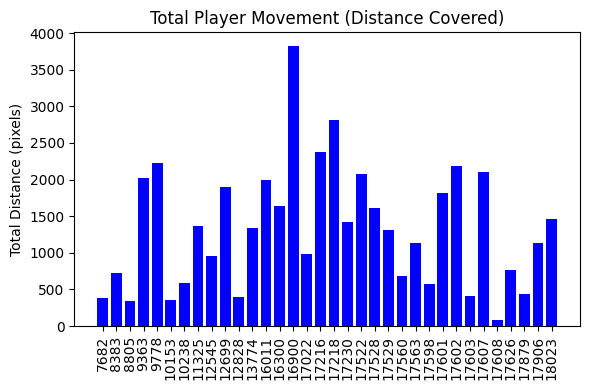

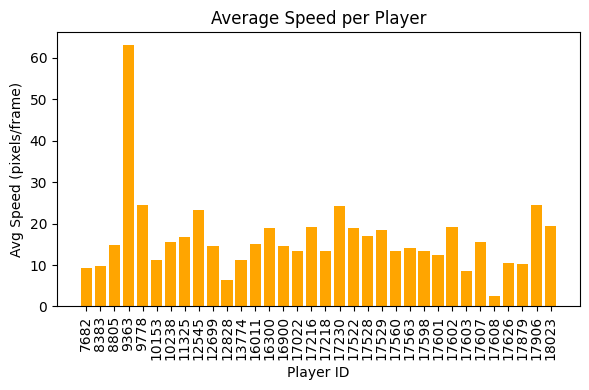

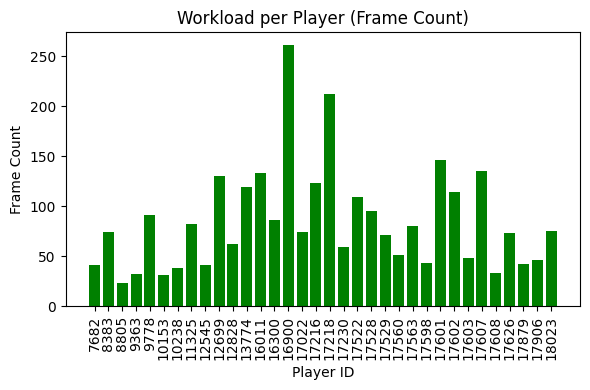

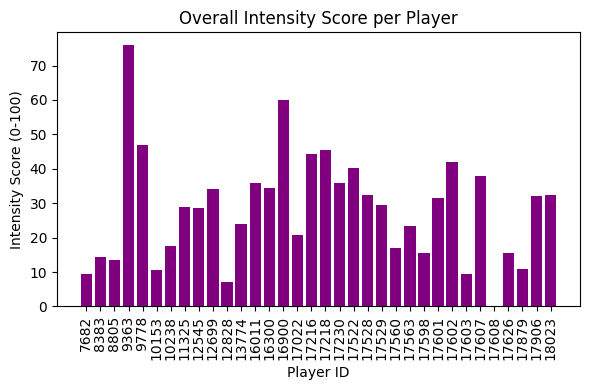

In [32]:
# Distance Covered
plt.figure(figsize=(6, 4))
plt.bar(metrics['track_id'].astype(str), metrics['total_distance'], color='blue')
plt.xticks(rotation=90)
plt.ylabel("Total Distance (pixels)")
plt.title("Total Player Movement (Distance Covered)")
plt.tight_layout()
plt.show()

# Average Speed
plt.figure(figsize=(6, 4))
plt.bar(metrics['track_id'].astype(str), metrics['avg_speed'], color='orange')
plt.xticks(rotation=90)
plt.ylabel("Avg Speed (pixels/frame)")
plt.xlabel('Player ID')
plt.title("Average Speed per Player")
plt.tight_layout()
plt.show()

# Workload (frames seen)
plt.figure(figsize=(6, 4))
plt.bar(metrics['track_id'].astype(str), metrics['workload'], color='green')
plt.xticks(rotation=90)
plt.ylabel("Frame Count")
plt.xlabel('Player ID')
plt.title("Workload per Player (Frame Count)")
plt.tight_layout()
plt.show()

# Intensity Score
plt.figure(figsize=(6, 4))
plt.bar(metrics['track_id'].astype(str), metrics['intensity'], color='purple')
plt.xticks(rotation=90)
plt.ylabel("Intensity Score (0-100)")
plt.xlabel('Player ID')
plt.title("Overall Intensity Score per Player")
plt.tight_layout()
plt.show()


In [33]:
import pandas as pd

# Load player physical metrics
df = pd.read_csv('player_physical_metrics.csv')
df.head()

track_id  total_distance  avg_speed  workload  norm_distance  norm_speed  \
0      7682      377.610837   9.210020        41       0.078076    0.109244   
1      8383      722.074219   9.757760        74       0.170360    0.118312   
2      8805      340.886364  14.821146        23       0.068237    0.202141   
3      9363     2016.420821  63.013151        32       0.517122    1.000000   
4      9778     2230.532133  24.511342        91       0.574484    0.362570   

   intensity  
0   9.366009  
1  14.433605  
2  13.518919  
3  75.856117  
4  46.852712

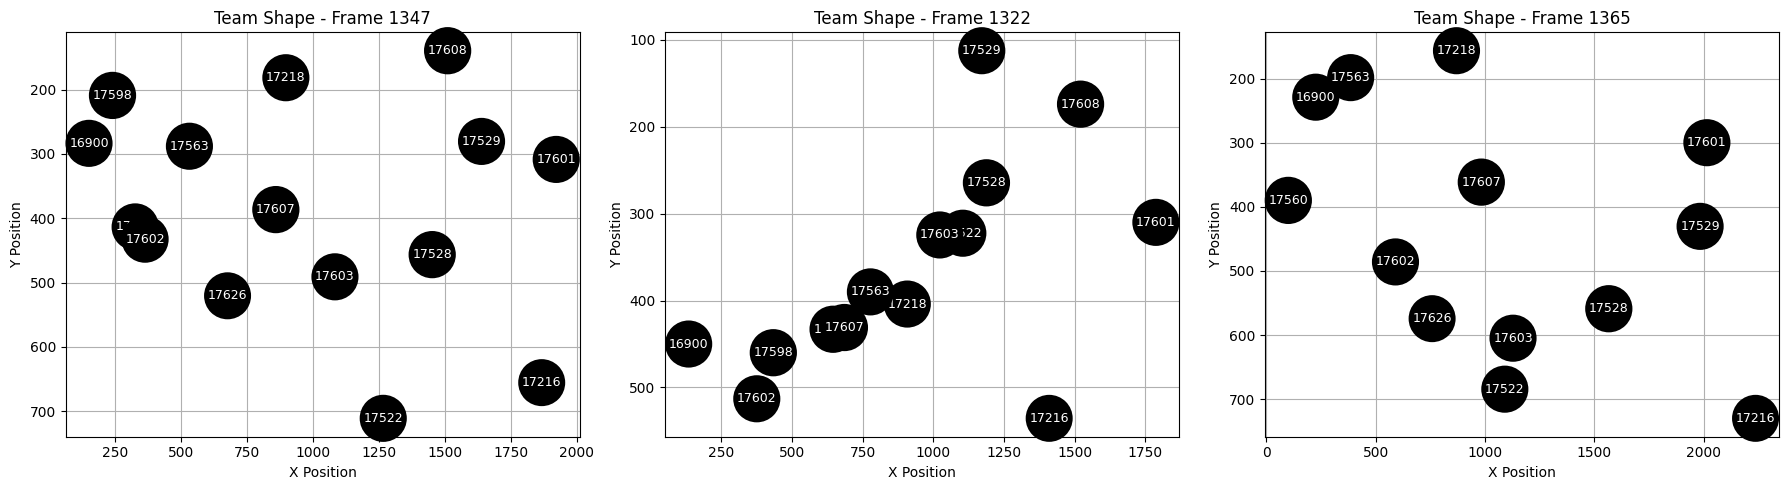

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the player tracking data
df = pd.read_csv("tracked_players.csv")

# Compute the center of the bounding boxes
df['cx'] = (df['x1'] + df['x2']) / 2
df['cy'] = (df['y1'] + df['y2']) / 2

# Get the top 3 unique frames with the most players
frame_counts = df['frame_id'].value_counts().sort_values(ascending=False)
unique_top_frames = frame_counts.drop_duplicates().head(3).index.tolist()

# Filter the data for those frames
shapes = df[df['frame_id'].isin(unique_top_frames)]

# Plot player positions in each frame
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, frame in enumerate(unique_top_frames):
    frame_data = shapes[shapes['frame_id'] == frame]
    axes[i].scatter(frame_data['cx'], frame_data['cy'], c='blue', s=100)

    # Add player ID labels inside the circles
    for _, row in frame_data.iterrows():
        axes[i].text(
            row['cx'], row['cy'], str(int(row['track_id'])),
            fontsize=9, ha='center', va='center', color='white',
            bbox=dict(facecolor='black', edgecolor='none', boxstyle='circle')
        )

    axes[i].invert_yaxis()
    axes[i].set_title(f'Team Shape - Frame {frame}')
    axes[i].set_xlabel("X Position")
    axes[i].set_ylabel("Y Position")
    axes[i].grid(True)

plt.tight_layout()
plt.show()


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the tracking data
df = pd.read_csv("tracked_players.csv")

# Calculate center positions from bounding boxes
df['cx'] = (df['x1'] + df['x2']) / 2
df['cy'] = (df['y1'] + df['y2']) / 2

# Sort values by player and time
df = df.sort_values(by=['track_id', 'frame_id'])

# Compute displacement and speed
df['dx'] = df.groupby('track_id')['cx'].diff()
df['dy'] = df.groupby('track_id')['cy'].diff()
df['distance'] = np.sqrt(df['dx']**2 + df['dy']**2)
df['speed'] = df['distance'].fillna(0)

# Compute acceleration (change in speed over time)
df['acceleration'] = df.groupby('track_id')['speed'].diff().fillna(0)



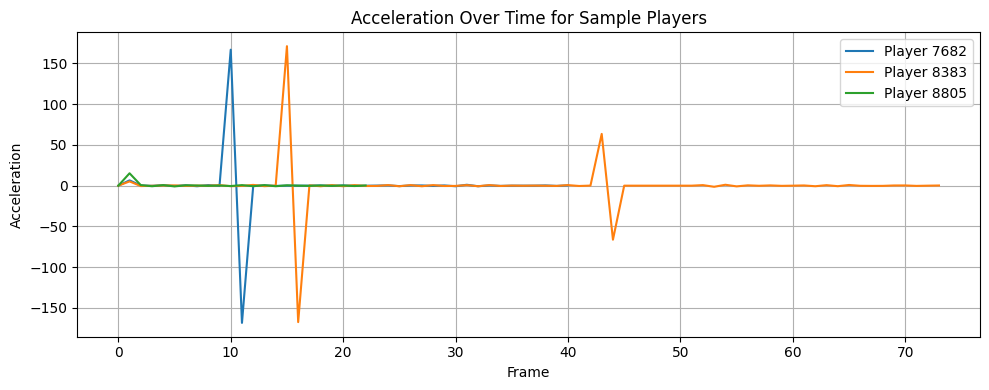

In [36]:
# Visualize acceleration for 3 sample players
sample_ids = df['track_id'].dropna().unique()[:3]

plt.figure(figsize=(10, 4))
for tid in sample_ids:
    subset = df[df['track_id'] == tid]
    plt.plot(subset['frame_id'], subset['acceleration'], label=f'Player {tid}')

plt.title("Acceleration Over Time for Sample Players")
plt.xlabel("Frame")
plt.ylabel("Acceleration")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
